# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [10]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [14]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Kookmin.txt", 'r', encoding='euc-kr')
message = f.read()
print(message)
f.close()

국민연금공단의 지원한 부서 입사 동기 및 이후의 포부를 묻고 있습니다. 
질문을 간단히 정리해보면, 첫째, 가장 열정적으로 임했던 경험, 둘째, 입사 후 자신이 청년으로서 국민연금공단에 어떤 기여를 할 수 있을지, 
이렇게 2가지 질문을 던져 주었습니다. 

첫째, 가장 열정적으로 임했던 경험은 반드시 지원직무와 관련될 필요는 없으나, 
가장 연관성 있는 경험을 선택하여 연결고리를 지어 작성하는 것이 유리합니다. 

국민연금공단 및 지원직무에 대한 조사를 바탕으로 인재상 등을 고려하여 이 직무를 지원자는 왜 하고 싶은 것이고, 
또 앞서 풀어낸 경험을 바탕으로 어떻게 잘할 수 있을지에 대한 부분을 언급해주면 좋을 것입니다. 

둘째, 입사 후 기여할 수 있는 부분에 대해서는, 지원직무와 연관하여 이루고자 하는 목표를 꿈으로 잡고 뒤이어 
그것을 위한 구체적인 노력을 작성해주면 되겠습니다. 

입사 후 포부는 나의 미래 설계도라는 개념을 가지고 포부와 함께 구체적인 실천방안을 현실적인 감각으로 작성해주어야 하겠습니다. 
구체적이라는 말은 언제까지, 어떻게, 무엇을 하고자 하는지 작성해준다는 감각으로 작성해주면 되겠습니다. 
국민연금공단의 경우 가장 중요한 회사의 핵심요소가 바로 국민연금입니다. 
국민연금과 관련하여서는 취지와 제도에 대한 이해 및 이에 대한 지원자의 견해까지 모두 지원 전에 미리 조사를 해 놓아야 면접까지 준비가 가능합니다. 
제도에 대한 필요성을 언급할 때는 너무 일반적인 이야기가 되지 않도록 지원자 자신의 견해 및 개인의 가치관까지 함께 이야기를 해주는 것도 좋은 경쟁력이 될 수 있습니다. 
지원자 자신이 생각하는 소중한 가치, 사회에서의 국민연금제도 필요성을 함께 고려하여 작성해보면 좋겠습니다. 

가치관으로 이야기를 풀어가기 어려울 경우엔 반드시 일반적인 다른 여러가지 국민연금제도의 장점 중에서 지원자가 생각하기에 
가장 크게 여겨지는 장점을 언급하며 그 이유 및 앞으로의 전망을 기재하는 방향으로 작성하는 것도 고려해보아야 겠습니다.


## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [15]:
# 연설문 1번 전처리
message = message.split('\n\n')
message

['국민연금공단의 지원한 부서 입사 동기 및 이후의 포부를 묻고 있습니다. \n질문을 간단히 정리해보면, 첫째, 가장 열정적으로 임했던 경험, 둘째, 입사 후 자신이 청년으로서 국민연금공단에 어떤 기여를 할 수 있을지, \n이렇게 2가지 질문을 던져 주었습니다. ',
 '첫째, 가장 열정적으로 임했던 경험은 반드시 지원직무와 관련될 필요는 없으나, \n가장 연관성 있는 경험을 선택하여 연결고리를 지어 작성하는 것이 유리합니다. ',
 '국민연금공단 및 지원직무에 대한 조사를 바탕으로 인재상 등을 고려하여 이 직무를 지원자는 왜 하고 싶은 것이고, \n또 앞서 풀어낸 경험을 바탕으로 어떻게 잘할 수 있을지에 대한 부분을 언급해주면 좋을 것입니다. ',
 '둘째, 입사 후 기여할 수 있는 부분에 대해서는, 지원직무와 연관하여 이루고자 하는 목표를 꿈으로 잡고 뒤이어 \n그것을 위한 구체적인 노력을 작성해주면 되겠습니다. ',
 '입사 후 포부는 나의 미래 설계도라는 개념을 가지고 포부와 함께 구체적인 실천방안을 현실적인 감각으로 작성해주어야 하겠습니다. \n구체적이라는 말은 언제까지, 어떻게, 무엇을 하고자 하는지 작성해준다는 감각으로 작성해주면 되겠습니다. \n국민연금공단의 경우 가장 중요한 회사의 핵심요소가 바로 국민연금입니다. \n국민연금과 관련하여서는 취지와 제도에 대한 이해 및 이에 대한 지원자의 견해까지 모두 지원 전에 미리 조사를 해 놓아야 면접까지 준비가 가능합니다. \n제도에 대한 필요성을 언급할 때는 너무 일반적인 이야기가 되지 않도록 지원자 자신의 견해 및 개인의 가치관까지 함께 이야기를 해주는 것도 좋은 경쟁력이 될 수 있습니다. \n지원자 자신이 생각하는 소중한 가치, 사회에서의 국민연금제도 필요성을 함께 고려하여 작성해보면 좋겠습니다. ',
 '가치관으로 이야기를 풀어가기 어려울 경우엔 반드시 일반적인 다른 여러가지 국민연금제도의 장점 중에서 지원자가 생각하기에 \n가장 크게 여겨지는 장점을 언급하며 그 이유 및 앞으로의 전망을 기재하는 

In [16]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message)
tf_bow1 = tf_vectorizer.fit_transform(message)
tf_bow1

<6x170 sparse matrix of type '<class 'numpy.int64'>'
	with 197 stored elements in Compressed Sparse Row format>

In [17]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

170
170


['2가지',
 '가능합니다',
 '가장',
 '가지고',
 '가치',
 '가치관까지',
 '가치관으로',
 '간단히',
 '감각으로',
 '개념을',
 '개인의',
 '것도',
 '것이',
 '것이고',
 '것입니다',
 '겠습니다',
 '견해',
 '견해까지',
 '경우',
 '경우엔',
 '경쟁력이',
 '경험',
 '경험은',
 '경험을',
 '고려하여',
 '고려해보아야',
 '관련될',
 '관련하여서는',
 '구체적이라는',
 '구체적인',
 '국민연금공단',
 '국민연금공단에',
 '국민연금공단의',
 '국민연금과',
 '국민연금입니다',
 '국민연금제도',
 '국민연금제도의',
 '그것을',
 '기여를',
 '기여할',
 '기재하는',
 '꿈으로',
 '나의',
 '너무',
 '노력을',
 '놓아야',
 '다른',
 '대한',
 '대해서는',
 '던져',
 '동기',
 '되겠습니다',
 '되지',
 '둘째',
 '뒤이어',
 '등을',
 '때는',
 '말은',
 '면접까지',
 '모두',
 '목표를',
 '무엇을',
 '묻고',
 '미래',
 '미리',
 '바로',
 '바탕으로',
 '반드시',
 '방향으로',
 '부분에',
 '부분을',
 '부서',
 '사회에서의',
 '생각하기에',
 '생각하는',
 '선택하여',
 '설계도라는',
 '소중한',
 '실천방안을',
 '싶은',
 '않도록',
 '앞서',
 '앞으로의',
 '어떤',
 '어떻게',
 '어려울',
 '언급하며',
 '언급할',
 '언급해주면',
 '언제까지',
 '없으나',
 '여겨지는',
 '여러가지',
 '연결고리를',
 '연관성',
 '연관하여',
 '열정적으로',
 '위한',
 '유리합니다',
 '이렇게',
 '이루고자',
 '이야기가',
 '이야기를',
 '이에',
 '이유',
 '이해',
 '이후의',
 '인재상',
 '일반적인',
 '임했던',
 '입사',
 '있는',
 '있습니다',
 '있을지',
 '있을지에',
 '자신의',
 '자신이',
 '작성하는',
 '작성해

In [18]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['2가지', '가능합니다', '가장', '가지고', '가치', '가치관까지', '가치관으로', '간단히', '감각으로', '개념을', '개인의', '것도', '것이', '것이고', '것입니다', '겠습니다', '견해', '견해까지', '경우', '경우엔', '경쟁력이', '경험', '경험은', '경험을', '고려하여', '고려해보아야', '관련될', '관련하여서는', '구체적이라는', '구체적인', '국민연금공단', '국민연금공단에', '국민연금공단의', '국민연금과', '국민연금입니다', '국민연금제도', '국민연금제도의', '그것을', '기여를', '기여할', '기재하는', '꿈으로', '나의', '너무', '노력을', '놓아야', '다른', '대한', '대해서는', '던져', '동기', '되겠습니다', '되지', '둘째', '뒤이어', '등을', '때는', '말은', '면접까지', '모두', '목표를', '무엇을', '묻고', '미래', '미리', '바로', '바탕으로', '반드시', '방향으로', '부분에', '부분을', '부서', '사회에서의', '생각하기에', '생각하는', '선택하여', '설계도라는', '소중한', '실천방안을', '싶은', '않도록', '앞서', '앞으로의', '어떤', '어떻게', '어려울', '언급하며', '언급할', '언급해주면', '언제까지', '없으나', '여겨지는', '여러가지', '연결고리를', '연관성', '연관하여', '열정적으로', '위한', '유리합니다', '이렇게', '이루고자', '이야기가', '이야기를', '이에', '이유', '이해', '이후의', '인재상', '일반적인', '임했던', '입사', '있는', '있습니다', '있을지', '있을지에', '자신의', '자신이', '작성하는', '작성해보면', '작성해주면', '작성해주어야', '작성해준다는', '잘할', '잡고', '장점', '장점을', '전망을', '전에', '정리해보면', '제도에', '조사를', '좋겠습니다', '좋은', '좋을', '주

array([1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       4, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1], dtype=int64)

In [19]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'2가지': 1,
 '가능합니다': 1,
 '가장': 5,
 '가지고': 1,
 '가치': 1,
 '가치관까지': 1,
 '가치관으로': 1,
 '간단히': 1,
 '감각으로': 2,
 '개념을': 1,
 '개인의': 1,
 '것도': 2,
 '것이': 1,
 '것이고': 1,
 '것입니다': 1,
 '겠습니다': 1,
 '견해': 1,
 '견해까지': 1,
 '경우': 1,
 '경우엔': 1,
 '경쟁력이': 1,
 '경험': 1,
 '경험은': 1,
 '경험을': 2,
 '고려하여': 2,
 '고려해보아야': 1,
 '관련될': 1,
 '관련하여서는': 1,
 '구체적이라는': 1,
 '구체적인': 2,
 '국민연금공단': 1,
 '국민연금공단에': 1,
 '국민연금공단의': 2,
 '국민연금과': 1,
 '국민연금입니다': 1,
 '국민연금제도': 1,
 '국민연금제도의': 1,
 '그것을': 1,
 '기여를': 1,
 '기여할': 1,
 '기재하는': 1,
 '꿈으로': 1,
 '나의': 1,
 '너무': 1,
 '노력을': 1,
 '놓아야': 1,
 '다른': 1,
 '대한': 5,
 '대해서는': 1,
 '던져': 1,
 '동기': 1,
 '되겠습니다': 2,
 '되지': 1,
 '둘째': 2,
 '뒤이어': 1,
 '등을': 1,
 '때는': 1,
 '말은': 1,
 '면접까지': 1,
 '모두': 1,
 '목표를': 1,
 '무엇을': 1,
 '묻고': 1,
 '미래': 1,
 '미리': 1,
 '바로': 1,
 '바탕으로': 2,
 '반드시': 2,
 '방향으로': 1,
 '부분에': 1,
 '부분을': 1,
 '부서': 1,
 '사회에서의': 1,
 '생각하기에': 1,
 '생각하는': 1,
 '선택하여': 1,
 '설계도라는': 1,
 '소중한': 1,
 '실천방안을': 1,
 '싶은': 1,
 '않도록': 1,
 '앞서': 1,
 '앞으로의': 1,
 '어떤': 1,
 '어떻게': 2,
 '어려울': 1,
 '언급하며': 1,
 '언급할

### 시각화

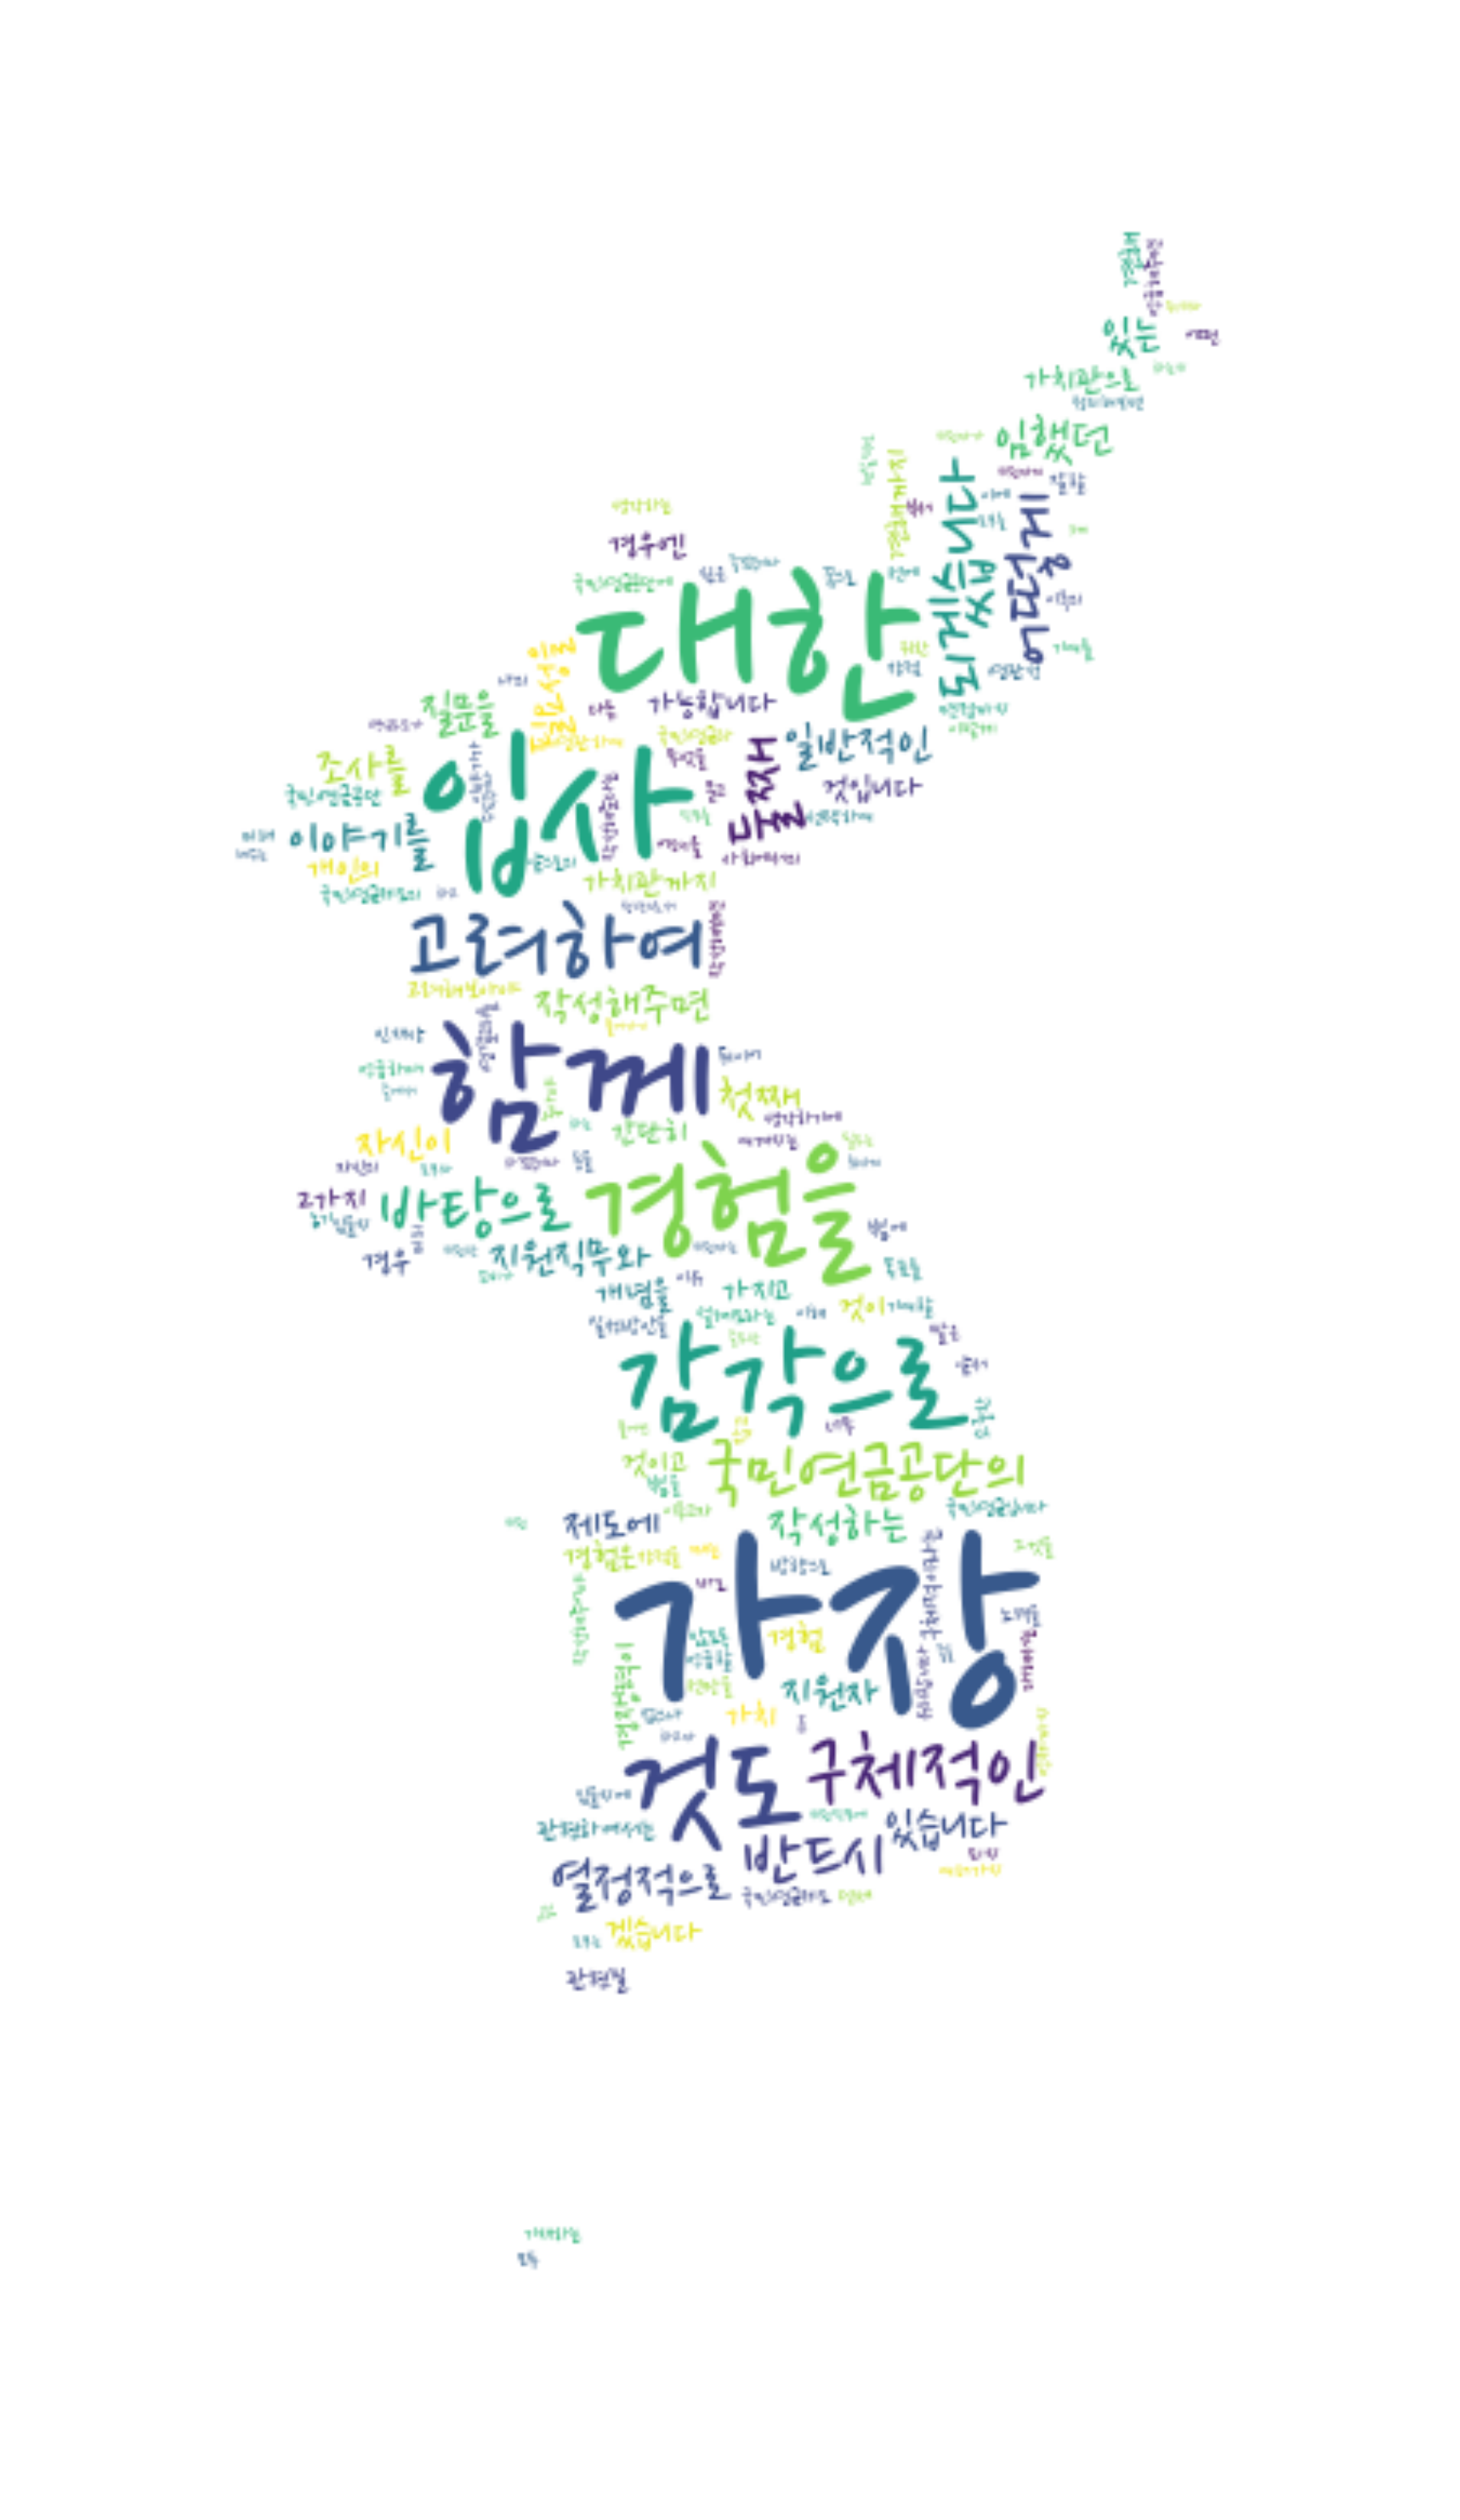

In [20]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기